
___
# Exercícios: TLC, Erro Amostral, Margem de erro e Tamanho Amostral
___

## Aula 18 - Exercícios

<div id="indice"></div>

## Índice

- [Tomando decisões com TLC](#tomando-decisoes)
- [Tempo de espera na fila do *check-in*](#tempoespera)
___

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

from math import sqrt

<div id="tomando-decisoes"></div>

## Tomando decisões com uso do TLC

Vamos considerar agora um exemplo (baseado no Exemplo 7-1 Montgomery). 

Um fabricante de componentes eletrônicos afirma que os resistores produzidos por ele possuem uma resistência média de $100 \Omega$ e um desvio padrão de $2 \Omega$. A distribuição da resistência de cada resistor é normal.

Antes de fechar uma grande compra com esse fabricante, considerando seus conhecimentos adquiridos ao longo da graduação no Insper, você decidiu solicitar uma pequena amostra de 25 resistores para realizar um teste de qualidade. O objetivo desta parte da atividade é decidir se você confia ou não na palavra do fabricante.

Considere aqui o valor de $\sigma=2$ teórica não esteja sendo questionado sobre a qualidade do fabricante.

a) Seja $\overline{X}$ a resistência média de uma amostra com 25 resistores selecionados aleatoriamente. De acordo com o TLC, qual é a distribuição de probabilidades de $\overline{X}$ (qual distribuição e quais os seus respectivos parâmetros)?

b) Construa um gráfico para visualizar a distribuição $X$ e de $\overline{X}$.

c) Assuma que o fabricante esteja produzindo resistores com $\mu=100 \Omega$. Assim, qual deve ser a região de valores de médias amostrais, todas com $n=25$, que contemplam $90\%$ das possíveis médias amostrais mais próximas de $\mu$.
Neste item, consulte o comando `stats.norm.interval()` explicado [aqui](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html).


d) Considerando o resultado do item anterior, obtenha a margem de erro quando $\mu=100 \Omega$, $n=25$ e coeficiente de confiança igual a $90\%$.

e) Se uma amostra de 25 resistores é coletada e a média amostral calculada é igual a $\overline{x}=98.929451$. Com $90\%$ de confianca, você acredita que essa amostra foi coletada de um população cuja verdadeira média é $\mu=100\Omega$? Ou seja, voce confia no fabricante?

<a href="#respostas1">Respostas</a>

**a)** $\overline{X}$ ~ Normal(100, 4/25)

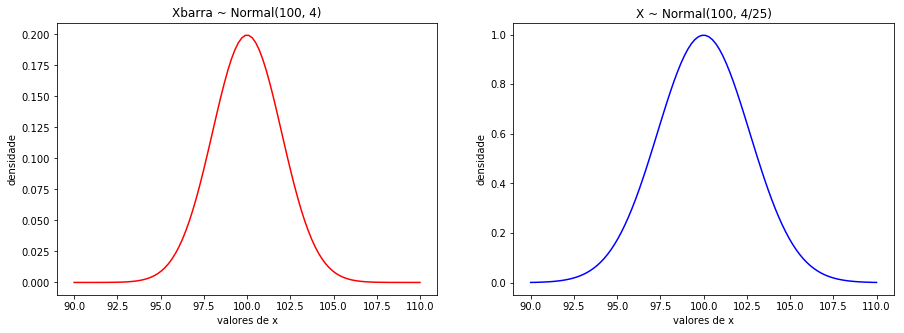

In [2]:
# Item b

from math import sqrt

mu = 100
sigma = 2
n = 25

x = np.linspace(90, 110, 100)
fx = stats.norm.pdf(x, loc = mu, scale = sigma)

x_barra = np.linspace(98.5, 101.5, 100)
fx_barra = stats.norm.pdf(x_barra, loc = mu, scale = sigma/sqrt(n)) 

fig = plt.figure(figsize=(15, 5))
# Plot da função densidade de uma exponencial com média = 8
plt.subplot(1, 2, 1)
plt.plot(x, fx, 'r')
plt.ylabel('densidade')
plt.xlabel('valores de x')
plt.title('Xbarra ~ Normal(100, 4)')

plt.subplot(1, 2, 2)
plt.plot(x, fx_barra, 'blue')
plt.ylabel('densidade')
plt.xlabel('valores de x')
plt.title('X ~ Normal(100, 4/25)')
plt.show()

In [3]:
# Item c

xbarra_menor, xbarra_maior = stats.norm.interval(0.9, loc = mu, scale = sigma/sqrt(n))

print("Xbarra menor: {}".format(xbarra_menor))
print("Xbarra maior: {}".format(xbarra_maior))

Xbarra menor: 99.34205854921942
Xbarra maior: 100.65794145078058


In [23]:
# Item d

E_alem = xbarra_maior - mu
E_aquem = xbarra_menor - mu

print("Margem de erro baseada na maior distância aquém de Mi: {}".format(E_aquem))
print("Margem de erro baseada na maior distância além de Mi: {}".format(E_alem))

Margem de erro baseada na maior distância aquém de Mi: -0.6579414507805836
Margem de erro baseada na maior distância além de Mi: 0.6579414507805836


**e)** Como 98.929451 está aquém de Xbarra aquém, então não se deve confiar.

___

<div id="tempofila"></div>

## Tempo de espera na fila

(Baseado no Exercício 7-12 Montgomery). 

O tempo que um consumidor esperando na fila de *check-in* de um aeroporto é uma variável aleatória com média de $\mu$ minutos e desvio padrão de $3.5$ minuto.
Suponha que uma amostra aleatória de $49$ consumidores seja observada.

a) Seja $\overline{X}$ o tempo médio de espera na fila de *check-in* considerando uma amostra de 49 consumidores selecionados aleatoriamente. Qual é a distribuição de probabilidades de $\overline{X}$ (qual distribuição e quais os seus respectivos parâmetros)? Aqui foi feito uso do TLC? Justifique porquê.

b) Assuma que $\mu=8.2$ minutos. Encontre a probabilidade de que o tempo médio de espera na fila seja:
  * Menor do que 10 minutos
  * Entre 8 e 10 minutos
  * Maior do que 9 minutos

c) Assuma que $\mu=8.2$ minutos. Assim, qual deve ser a região de valores de médias amostrais, todas com $n=49$, que contemplam $95\%$ das possíveis médias amostrais mais próximas de $\mu$.

d) Considerando o resultado do item anterior, obtenha a margem de erro quando $\mu=8.2$ minutos, $n=49$ e coeficiente de confiança igual a $95\%$.

e) Considerando agora que $\mu$ é desconhecido, obtenha a margem de erro quando $n=49$ e coeficiente de confiança igual a $95\%$.

f) Qual deveria ser o tamanho da amostra, para ter margem de erro de $0.5$ minutos e coeficiente de confiança igual a $95\%$.

<a href="#respostas2">Respostas</a>

**a)**

In [6]:
var_x = 3.5**2
n= 49

var_xbarra = var_x/n

print("Distribuição normal com média mu e variância {0}".format(var_xbarra))

Distribuição normal com média mu e variância 0.25


**b)**

In [7]:
mu = 8.2

MenorDoq10Min = stats.norm.cdf(10, loc=mu, scale=sqrt(var_xbarra))
Entre8e10Min = stats.norm.cdf(10, loc=mu, scale=sqrt(var_xbarra)) - stats.norm.cdf(8, loc=mu, scale=sqrt(var_xbarra))
MaiorDoq9Min = 1 - stats.norm.cdf(9, loc=mu, scale=sqrt(var_xbarra))

print("Prob. menor do que 10 min: {}".format(MenorDoq10Min))
print("Prob. entre 8 e 10 min: {}".format(Entre8e10Min))
print("Prob. maior do que 9 min: {}".format(MaiorDoq9Min))

Prob. menor do que 10 min: 0.9998408914098424
Prob. entre 8 e 10 min: 0.6552626330201661
Prob. maior do que 9 min: 0.054799291699557884


**c)**

In [8]:
xbarra_menor, xbarra_maior = stats.norm.interval(0.95, loc=mu, scale=sqrt(var_xbarra))

print("Vai de {0} até {1}".format(xbarra_menor, xbarra_maior))

Vai de 7.220018007729973 até 9.179981992270026


**d)**

In [9]:
E_alem = xbarra_maior - mu
E_aquem = xbarra_menor - mu

print("Margem de erro baseada na maior distância aquém de Mi: {}".format(E_aquem))
print("Margem de erro baseada na maior distância além de Mi: {}".format(E_alem))

Margem de erro baseada na maior distância aquém de Mi: -0.9799819922700266
Margem de erro baseada na maior distância além de Mi: 0.9799819922700266


**e)**

In [16]:
E_alem

0.9799819922700266

**f)**

In [15]:
z = E_alem/(sqrt(var_xbarra)/sqrt(n))
n = (z*sqrt(var_xbarra)/0.5)**2
n

188.23148221401198

<div id="respostas"></div>

---
# Respostas

<a href="#indice">Voltar para o índice</a>

<div id="respostas1"></div>

### Respostas do exercício - Tomando decisões com TLC

**item a)** Normal(100, 0.16)

**item b)** São gráficos semelhantes a esses:

![](./fig_exerc1_itemb.png)


**item c)** A região de 90% das possíveis médias amostrais mais próximas de mu=100 vai de: 
99.3421 até 100.658

**item d)** 
A margem de erro é o maior erro, para mais ou para menos, que uma média amostral pode ter para estimar $\mu$,
quando considera 90% das possíveis médias amostrais mais próximos do verdadeiro valor ($\mu$).
  * A margem de erro baseada na maior distância aquém de $\mu$ é: -0.657941
  * A margem de erro baseada na maior distância além de $\mu$ é: 0.657941


**item e)** Como xbarra=98.929451 está aquém da menor média, então não confio, com 90% de confiança.


<a href="#tomando-decisoes">Voltar para enunciado</a>



<div id="respostas2"></div>

### Respostas do exercício - Tempo de espera na fila do *check-in*

**item a)** 
$\overline{X}$ ~ Normal($\mu$, 12.25/49) ou, equivalente, $\overline{X}$ ~ Normal($\mu$, 0.25)

**item b)** 
* P($\overline{X}$ < 10) = 0.99984
* P(8 < $\overline{X}$ < 10) = 0.65526
* P($\overline{X}$ > 9) = 0.054799


**item c)** A região de 95% das possíveis médias amostrais mais próximas de mu=8.2 vai de: 
7.22002 até 9.17998


**item d)** 
A margem de erro é o maior erro, para mais ou para menos, que uma média amostral pode ter para estimar $\mu$,
quando considera 95% das possíveis médias amostrais mais próximos do verdadeiro valor ($\mu$).
  * A margem de erro baseada na maior distância aquém de $\mu$ é: -0.979982
  * A margem de erro baseada na maior distância além de $\mu$ é: 0.979982


**item e)** A margem de erro mantendo $n=49$ e 95% de confiança é 0.979982


**item f)** Tamanho da amostra para margem de erro de 0.5 minuto mantendo 95% de confiança é 188.

<a href="#tempoespera">Voltar para enunciado</a>

___

